In [3]:
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.1.4'

# READ DATA
* 오른쪽에서 폴더 아이콘 누르고 드라이브 연결
* 원하는 폴더 위에서 경로 복사

In [7]:
# index_col = 하고 원하는 컬럼명 넣으면 대체됨

movies = pd.read_csv('/content/drive/MyDrive/추천시스템 입문반/DATA/ml-latest-small/movies.csv', index_col='movieId')
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [ ]:
movies.shape

(9742, 2)

In [ ]:
movies.sample(5) # 랜덤으로 몇개 뽑아와 봄

,title,genres
movieId,,
823,"Collector, The (La collectionneuse) (1967)",Drama
5155,"Big Bird Cage, The (1972)",Action
1453,"Beautician and the Beast, The (1997)",Comedy|Romance
57421,Hatchet (2006),Comedy|Horror
1977,Friday the 13th Part IV: The Final Chapter (1984),Horror


# 영화 개봉연도 분석

## 개봉연도 데이터 정제하기
* 괄호 안에 있는 것들을 정규식으로 전처리
* str.extract( '( )' )
* \d 는 숫자, \(로 괄호까지 함께 찾아준다 (=왜냐면 영화 제목안에 연도로 인식될 수 있는 숫자가 있을 수 있음)


In [20]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')
movies

,title,genres,year
movieId,,,
32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,1902
49389,The Great Train Robbery (1903),Crime|Western,1903
140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,1908
7065,"Birth of a Nation, The (1915)",Drama|War,1915
102747,"Rink, The (1916)",Comedy,1916
...,...,...,...
171631,Maria Bamford: Old Baby,(no genres listed),NaN
162414,Moonlight,Drama,NaN
176601,Black Mirror,(no genres listed),NaN


In [21]:
movies['year'].unique()

array(['1902', '1903', '1908', '1915', '1916', '1917', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936',
       '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', nan], dtype=object)

## 결측값 핸들링하기
* isnull을 쓰고 바로 해당 테이블로 감싸서 호출하면 nan값만 가져옴

In [22]:
movies[movies['year'].isnull()]

,title,genres,year
movieId,,,
143410,Hyena Road,(no genres listed),NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
171891,Generation Iron 2,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
171749,Death Note: Desu nôto (2006–2007),(no genres listed),NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN
171631,Maria Bamford: Old Baby,(no genres listed),NaN


In [23]:
movies['year'] = movies['year'].fillna(2050) # 2050년으로 퉁쳐주기
movies['year'].unique()

array(['1902', '1903', '1908', '1915', '1916', '1917', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936',
       '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', 2050], dtype=object)

## 개봉연도 기반으로 정렬하기

In [25]:
# 2050이 껴있으므로 sring으로 바꿔준다
movies['year'] = movies['year'].astype(str) 

In [26]:
movies = movies.sort_values(by='year')
movies

,title,genres,year
movieId,,,
32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,1902
49389,The Great Train Robbery (1903),Crime|Western,1903
140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,1908
7065,"Birth of a Nation, The (1915)",Drama|War,1915
102747,"Rink, The (1916)",Comedy,1916
...,...,...,...
149334,Nocturnal Animals,Drama|Thriller,2050
143410,Hyena Road,(no genres listed),2050
156605,Paterson,(no genres listed),2050


## 데이터에 가장 많이 출현한 개봉연도 시각화

In [ ]:
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1922      1
1919      1
1915      1
1903      1
1921      1
Name: year, Length: 107, dtype: int64

In [ ]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt # seaborn에 figure 크기 조절을 위해 넣어줌

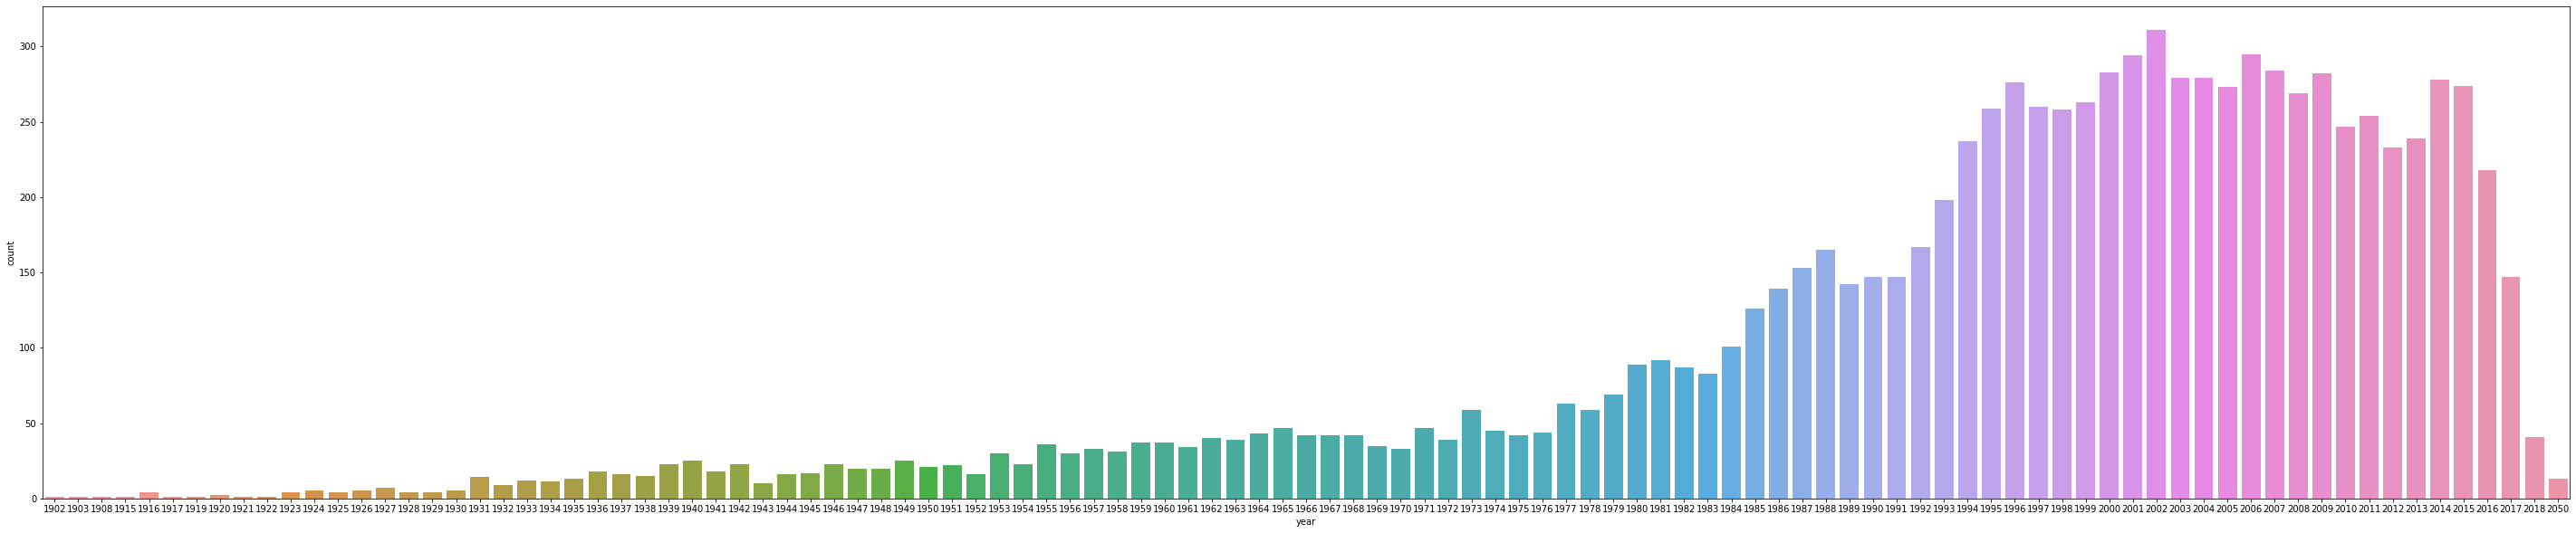

In [ ]:
plt.figure(figsize = (50,10)) # figsize 조절은 무조건 위쪽에 작성해줘야함
sns.countplot(data = movies, x='year') #countplot을 그리면 굳이 value_counts한 것을 데이터프레임에 다시 넣지 않아도 됨

## 총 장르 종류와 개수세기
* 리스트 안의 리스트 형태를 하나로 합쳐줄 땐 이중for문

In [ ]:
sample_genre = movies['genres'][1]
sample_genre

'Adventure|Animation|Children|Comedy|Fantasy'

In [ ]:
sample_genre.split('|') # split은 지정된 문자 기준으로 나누고 리스트 형태로 반환

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [28]:
genres_list = list(movies['genres'].apply(lambda x : x.split('|'))) # lambda함수 인덱싱 아니어도 이렇게 쓸 수 있다
genres_list[:3]

[['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Crime', 'Western'],
 ['Animation', 'Comedy', 'Sci-Fi']]

In [ ]:
# genres_list 라는 큰 리스트 안에 각 영화별 장르가 리스트 형태로 들어가 있음
# sublist로 치환하고 for문을 한번 더 돌려서 flat_list라는 리스트에 개별로 넣어줌

flat_list = []

for sublist in genres_list: # 두개 따로하면 안됨
  for item in sublist:
    flat_list.append(item)

In [ ]:
# 중복되는 내용들은 set으로 바꿔서 없애주고 다시 리스트화 해준다

genres_unique = list(set(flat_list))
len(genres_unique) # 장르가 없는 것을 제외하면 총 19개의 장르가 있다

20

## 장르 데이터를 숫자로 변환해서 더미코딩하기
* pickle은 데이터프레임을 저장하기 용이 (인덱스까지 함께 저장하므로)

### 더미코딩 #1 : "in"을 활용하는 방법

In [ ]:
sample_genre

'Adventure|Animation|Children|Comedy|Fantasy'

In [ ]:
# 맞으면 T 아니면 F로 반환함

'Adventure' in sample_genre

True

In [ ]:
# 모든 장르에 대해 아래와 같은 코드를 쓰면 테이블 끝쪽에 계속 T/F로 더미코딩 가능

movies['Adventure'] = movies['genres'].apply(lambda x: 'Adventure' in x)
movies

,title,genres,year,Adventure
movieId,,,,
32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,1902,True
49389,The Great Train Robbery (1903),Crime|Western,1903,False
140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,1908,False
7065,"Birth of a Nation, The (1915)",Drama|War,1915,False
7243,Intolerance: Love's Struggle Throughout the Ag...,Drama,1916,False
...,...,...,...,...
140956,Ready Player One,Action|Sci-Fi|Thriller,2050,False
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),2050,False
167570,The OA,(no genres listed),2050,False


### 더미코딩 #2: get_dummies를 활용하는 방법
* str.get_dummies(sep='기준')

In [34]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')
genres_dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
32898,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
49389,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
140541,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7065,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
102747,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149334,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
143410,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
genres_dummies.to_pickle('/content/drive/MyDrive/추천시스템 입문반/DATA/ml-latest-small/genres.p')